# COMMON TOOLS FOR DATA SCIENCE

# 环境准备

In [84]:
import matplotlib.pyplot as plt

# 设置中文字体
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签

## 读取数据

In [85]:
from data_preprocessing.loader import load_data

df, info = load_data(r'../executable/2025-Project-Data(ESM Table 1).csv')
print(df.head())
print(f"Info: {info}")

          Label           Deposit   SiO2  TiO2  Al2O3  TFe2O3   MnO   MgO  \
0  Au-rich PCDs  Oyu Tolgoi Cu-Au  65.37  0.60  17.98    5.39  0.12  1.53   
1  Au-rich PCDs  Oyu Tolgoi Cu-Au  57.42  0.58  17.77    5.19  0.19  1.48   
2  Au-rich PCDs  Oyu Tolgoi Cu-Au  63.10  0.33  16.61    3.78  0.08  0.73   
3  Au-rich PCDs  Oyu Tolgoi Cu-Au  65.13  0.31  16.21    3.68  0.10  0.79   
4  Au-rich PCDs  Oyu Tolgoi Cu-Au  64.38  0.35  17.36    3.74  0.04  0.82   

    CaO  Na2O  ...    Dy    Ho    Er    Tm    Yb    Lu   Hf    Ta    Th     U  
0  3.89  4.92  ...  3.35  0.63  1.93  0.27  2.00  0.32  3.0  0.40  2.63  1.54  
1  4.52  5.48  ...  3.30  0.70  2.10  0.30  2.10  0.30  3.0  0.50  3.00  1.30  
2  1.96  4.91  ...  1.91  0.40  1.26  0.21  1.54  0.28  2.4  0.34  2.81  1.71  
3  1.97  4.99  ...  1.90  0.40  1.25  0.20  1.46  0.25  2.5  0.34  2.63  1.32  
4  1.60  5.61  ...  2.07  0.43  1.32  0.22  1.59  0.28  2.4  0.30  2.38  1.54  

[5 rows x 36 columns]
Info: CSV 文件 ../executable/2025-Pr

## 数据校验

In [86]:
from data_preprocessing.validator import verify_dtype, handle_missing_values, flag_outliers

valid, error_location, info = verify_dtype(df, {"SiO2": "float64",})

print(f"Schema valid: {valid}")
print(f"Error location: {error_location}")
print(f"Info: {info}")

Schema valid: True
Error location: {}
Info: 所有列 dtype 与预期一致


## 缺失值处理

In [87]:
from data_preprocessing.validator import handle_missing_values, flag_outliers

df_miss, info = handle_missing_values(df, method='zero')

print(f"Missing values handled: {df_miss.isnull().sum()}")
print(f"Info: {info}")

Missing values handled: Label      0
Deposit    0
SiO2       0
TiO2       0
Al2O3      0
TFe2O3     0
MnO        0
MgO        0
CaO        0
Na2O       0
K2O        0
P2O5       0
Rb         0
Sr         0
Y          0
Zr         0
Nb         0
Ba         0
La         0
Ce         0
Pr         0
Nd         0
Sm         0
Eu         0
Gd         0
Tb         0
Dy         0
Ho         0
Er         0
Tm         0
Yb         0
Lu         0
Hf         0
Ta         0
Th         0
U          0
dtype: int64
Info: 缺失值处理完成，使用方法: zero


## CLR 变换

In [88]:
from data_preprocessing.transform import clr_transform

df_clr, info = clr_transform(df, ["SiO2", "TiO2", "Al2O3", "TFe2O3", "MnO", "MgO", "CaO", "Na2O", "K2O", "P2O5"])
print(f"CLR transformed data: {df_clr.head()}")

CLR transformed data:           Label           Deposit  clr_SiO2  clr_TiO2  clr_Al2O3  clr_TFe2O3  \
0  Au-rich PCDs  Oyu Tolgoi Cu-Au  0.016901  0.339762   0.111819    0.373189   
1  Au-rich PCDs  Oyu Tolgoi Cu-Au -0.112769  0.305860   0.100071    0.335377   
2  Au-rich PCDs  Oyu Tolgoi Cu-Au -0.018441 -0.258075   0.032564    0.018368   
3  Au-rich PCDs  Oyu Tolgoi Cu-Au  0.013223 -0.320596   0.008188   -0.008444   
4  Au-rich PCDs  Oyu Tolgoi Cu-Au  0.001641 -0.199235   0.076728    0.007729   

    clr_MnO   clr_MgO   clr_CaO  clr_Na2O   clr_K2O  clr_P2O5  
0  0.912696  0.045828  0.221817  0.269416  0.284446  0.413971  
1  1.372228  0.012602  0.371920  0.377213  0.284446  0.531754  
2  0.507230 -0.694151 -0.463648  0.267382  0.519657 -0.199133  
3  0.730374 -0.615162 -0.458559  0.283544  0.355354 -0.279176  
4 -0.185917 -0.577891 -0.666589  0.400659  0.473137 -0.279176  


# Random Forest
对CLR变换后和未变化的结果，同时进行随机森林分类（使用相同的树数量），并对比结果

结果表明随机森林分类似乎对数据的对数变换不敏感。

In [89]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df_clr.drop(['Label', 'Deposit'], axis=1)
y = df_clr['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestClassifier(n_estimators=3, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('CLR 清理后的分类结果：\n', classification_report(y_test, y_pred))

X = df.drop(['Label', 'Deposit'], axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestClassifier(n_estimators=3, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('CLR 未清理的分类结果：\n', classification_report(y_test, y_pred))

CLR 清理后的分类结果：
               precision    recall  f1-score   support

Au-rich PCDs       0.85      0.76      0.80        29
Cu-rich PCDs       0.89      0.93      0.91        60

    accuracy                           0.88        89
   macro avg       0.87      0.85      0.86        89
weighted avg       0.87      0.88      0.87        89

CLR 未清理的分类结果：
               precision    recall  f1-score   support

Au-rich PCDs       0.84      0.90      0.87        29
Cu-rich PCDs       0.95      0.92      0.93        60

    accuracy                           0.91        89
   macro avg       0.89      0.91      0.90        89
weighted avg       0.91      0.91      0.91        89



确定最佳树的数量，树越多，模型越稳定，但计算成本越高。此外树太少可能欠拟合，太多可能过拟合，影响模型性能。

根据验证误差曲线选择24颗树最合适，此时训练集和验证集的误差都不再下降，是合理的选择。

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

Optimal number of trees: 13
Minimum validation error: 0.2854


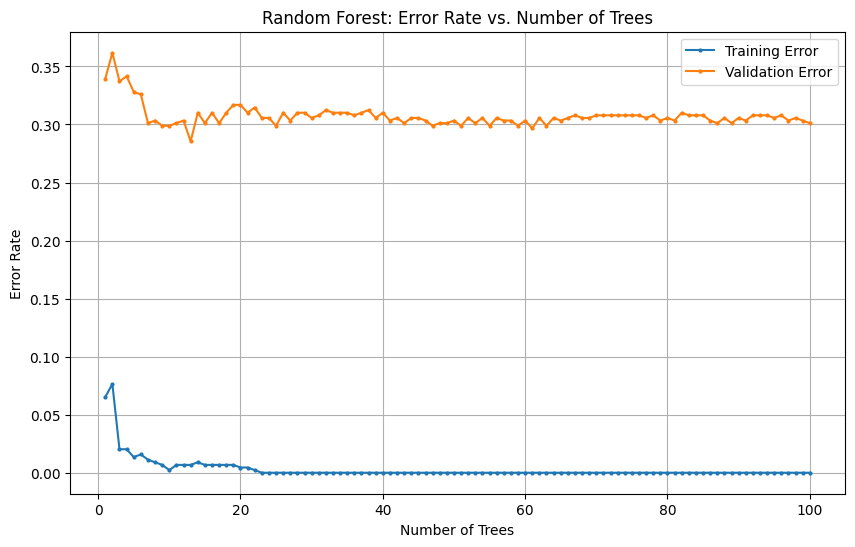

In [90]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# 定义要测试的树的数量范围
n_trees = range(1, 101, 1)

# 存储训练和验证分数
train_scores = []
val_scores = []

# 对每个树的数量进行测试
for n in n_trees:
    # 创建随机森林分类器
    rf = RandomForestClassifier(n_estimators=n, random_state=0)
    
    # 使用交叉验证计算验证分数
    val_score = cross_val_score(rf, X, y, cv=5, scoring='accuracy').mean()
    val_scores.append(1 - val_score)  # 转换为误差
    
    # 在训练集上训练并计算训练分数
    rf.fit(X, y)
    train_pred = rf.predict(X)
    train_score = accuracy_score(y, train_pred)
    train_scores.append(1 - train_score)  # 转换为误差

# 绘制误差曲线
plt.figure(figsize=(10, 6))
plt.plot(n_trees, train_scores, label='Training Error', marker='o', markersize=2)
plt.plot(n_trees, val_scores, label='Validation Error', marker='o', markersize=2)
plt.xlabel('Number of Trees')
plt.ylabel('Error Rate')
plt.title('Random Forest: Error Rate vs. Number of Trees')
plt.legend()
plt.grid(True)

# 打印最佳树的数量
best_n = n_trees[np.argmin(val_scores)]
print(f'Optimal number of trees: {best_n}')
print(f'Minimum validation error: {min(val_scores):.4f}')

# SVM with RBF kernel

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

SVM classifier: SVC(C=10)
              precision    recall  f1-score   support

Au-rich PCDs       0.81      0.76      0.79        29
Cu-rich PCDs       0.89      0.92      0.90        60

    accuracy                           0.87        89
   macro avg       0.85      0.84      0.84        89
weighted avg       0.86      0.87      0.86        89



<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

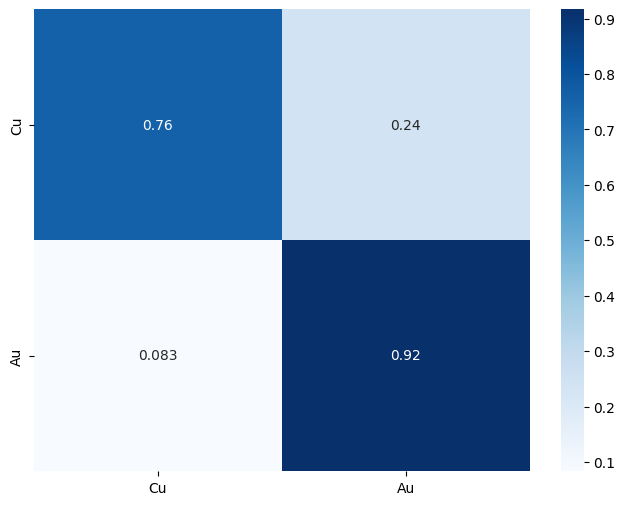

In [99]:
from modeling.svm_classifier import train_svm_classifier, classification_report

X = df_clr.drop(['Label', 'Deposit'], axis=1)
y = df_clr['Label']

SVM_model, SVM_results = train_svm_classifier(X, y, test_size=0.2, random_state=0)
print(f"SVM classifier: {SVM_model}")
print(SVM_results["classification_report"])

import seaborn as sns
plt.figure(figsize=(8, 6))
confusion_matrix = SVM_results["confusion_matrix"]
# 将混淆矩阵转换为百分比
confusion_matrix_percent = confusion_matrix / confusion_matrix.sum(axis=1).reshape(-1, 1)
sns.heatmap(confusion_matrix_percent, annot=True, fmt='.2', cmap='Blues', xticklabels=["Cu", "Au"], yticklabels=["Cu", "Au"])